In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Make images to a common size (32x32), (64x64)

In [2]:
pos = [(32,32),(64,64)]

In [3]:
def preprocess(im):
    norm_image = cv2.normalize(im, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return norm_image

../Data/seal/banvali\10000.jpg
../Data/seal/banvali\10001.jpg
../Data/seal/banvali\10002.jpg
../Data/seal/banvali\10003.jpg
../Data/seal/banvali\10004.jpg
../Data/seal/banvali\10005.jpg
../Data/seal/banvali\10006.jpg
../Data/seal/banvali\10007.jpg
../Data/seal/banvali\10008.jpg
../Data/seal/banvali\10009.jpg
../Data/seal/banvali\10010.jpg
../Data/seal/banvali\10011.jpg
../Data/seal/banvali\10012.jpg
../Data/seal/banvali\10013.jpg
../Data/seal/banvali\10014.jpg
../Data/seal/banvali\10015.jpg
../Data/seal/banvali\10016.jpg
../Data/seal/banvali\10017.jpg
../Data/seal/banvali\10018.jpg
../Data/seal/banvali\10019.jpg
../Data/seal/banvali\10020.jpg
../Data/seal/banvali\10021.jpg
../Data/seal/banvali\10022.jpg
../Data/seal/banvali\10023.jpg
../Data/seal/banvali\10024.jpg
../Data/seal/banvali\10025.jpg
../Data/seal/banvali\10026.jpg
../Data/seal/banvali\10027.jpg
../Data/seal/banvali\10028.jpg
../Data/seal/banvali\10029.jpg
../Data/seal/banvali\10030.jpg
../Data/seal/banvali\10031.jpg
../Data/

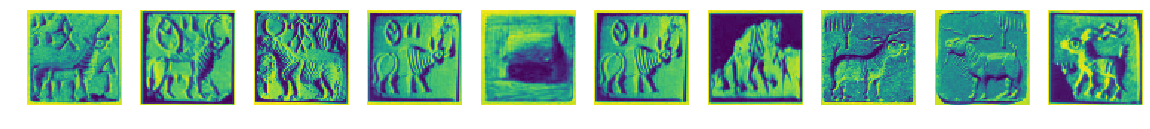

In [6]:
loc = "../Data/seal/banvali"
data = []
for i in glob.glob(loc+"/*.jpg"):
    print(i)
    im = cv2.imread(i,0)
    im = cv2.resize(im,pos[1])
    im = preprocess(im)
    data.append(im)


fig = plt.figure(figsize=[20,20])

for i in range(10):
    j = random.randint(0,50)
    im = data[j]
    ax = fig.add_subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(im)
plt.show()


### 64x64 tends to work better 32x32 in visualization

### Make clusters of image using various technique
### Perform PCA 

In [32]:
def get_embeddings(data):
    
    flattened = list()
    for im in data:
        flattened.append(im.flatten())
    
    ft = np.array(flattened)
    p = PCA() # 90 % variance on 70
    ft = p.fit_transform(ft)
    total = np.sum(p.explained_variance_)
    print(total)
    vals = np.cumsum(p.explained_variance_)/total
    gi = 0
    for i in range(0,len(vals)):
        if(vals[i]>0.90):
            gi = i
            break
    p = PCA(2) # 90 % variance on 70
    ft = p.fit_transform(ft)
    return ft




In [36]:
fts = get_embeddings(data)
print(fts[:,1])

313.15314
[ -3.1926196   -2.9758115   -0.38867152   6.8553467   -3.3240106
   0.11142554   2.7327735   -5.908799    -2.2556686    4.576456
   3.5288887   -7.0909886    3.8106544    1.984347    -1.7943237
  -5.883052     1.0431356   -2.9949877    7.303521     2.2490828
  -2.607606    -1.9017981   -3.1952968    5.0314116    9.416031
   4.8738914    2.2731369   -5.3085613    5.1531973    2.0235379
  -0.30765224   6.3653836    0.11771753   5.2114697    0.10480154
   0.06471315   7.5571465    0.97969836   0.84748805  -6.957983
   1.8883986   -0.85360414  13.824876    -3.833412     1.3365213
   3.5555835    7.224025    13.743029    -3.9214714   -3.5980687
   0.3565229  -12.54263     -7.1150694  -10.655703    -8.464224
  -8.998067    -9.753146    -0.32098186]


(58,)


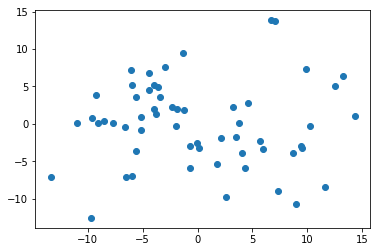

In [49]:

plt.scatter(fts[:,0], fts[:,1])
c = ["" for i in range(fts[:,0].shape[0])]
plt.show()

### Cluster the embeddings here

In [45]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(fts)

In [39]:
score = silhouette_score(fts, kmeans.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)


Silhouetter Score: 0.428


Plot images of each label

ValueError: could not convert string to float: 'blue'

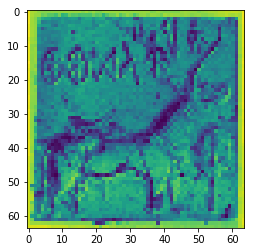

In [51]:
labels = kmeans.labels_
count = 0
for i in range(len(data)):
    if(labels[i]==1):
        plt.imshow(data[i])
        count+=1
        c[i] = "blue"
        plt.show()
    # if(count==10):
    #     break


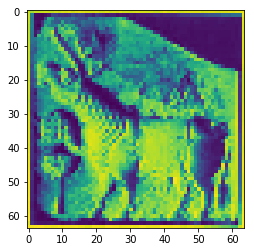

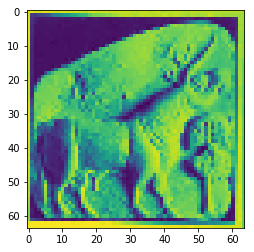

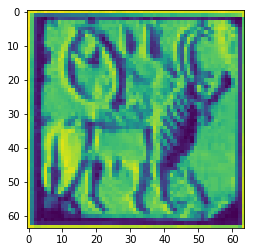

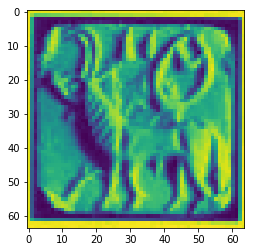

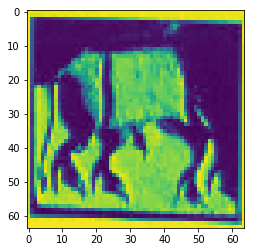

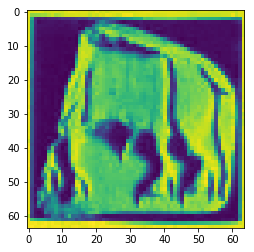

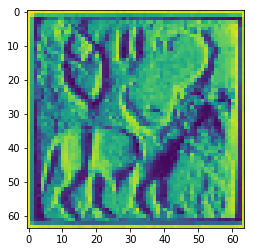

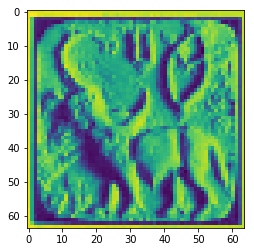

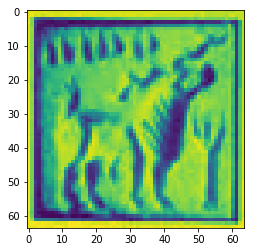

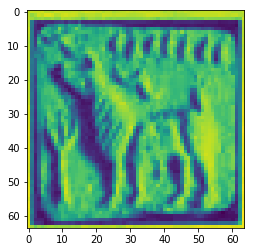

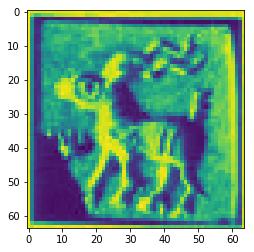

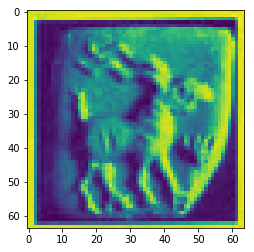

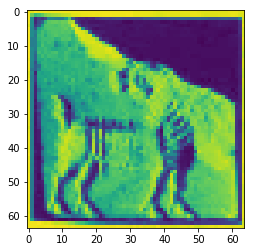

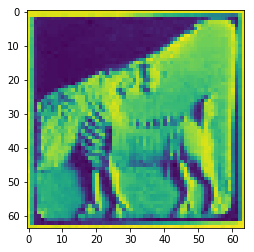

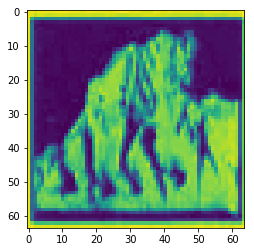

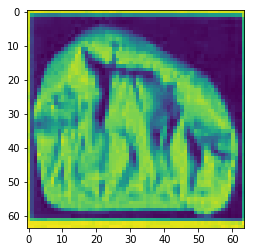

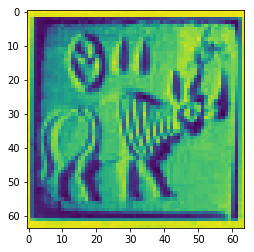

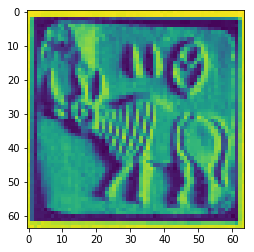

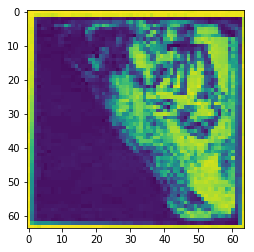

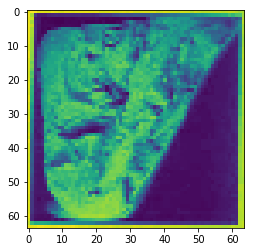

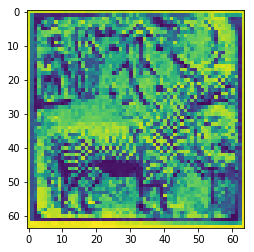

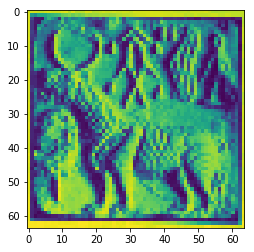

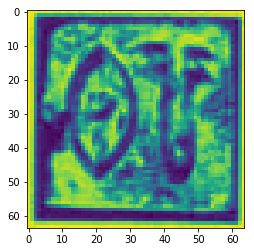

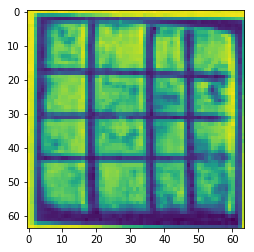

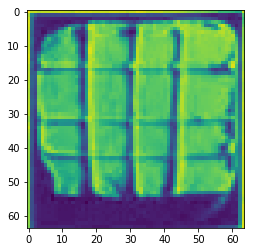

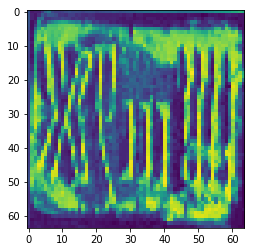

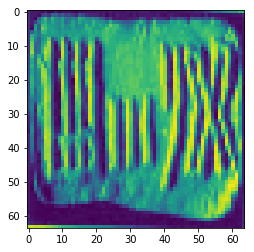

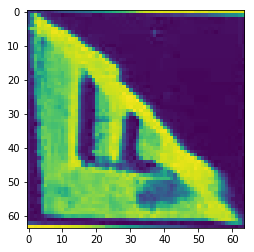

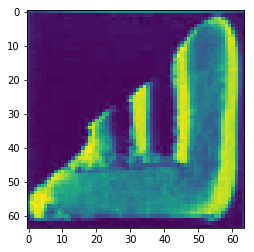

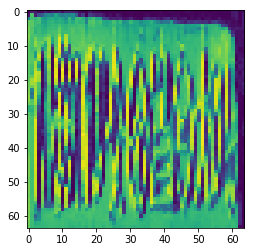

In [47]:
labels = kmeans.labels_
count = 0
for i in range(len(data)):
    if(labels[i]==0):
        plt.imshow(data[i])
        count+=1
        c[i] = "red"
        plt.show()
    # if(count==10):
    #     break

AttributeError: 'numpy.ndarray' object has no attribute 'append'

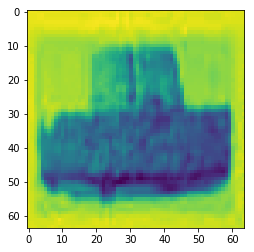

In [50]:
labels = kmeans.labels_
count = 0
for i in range(len(data)):
    if(labels[i]==2):
        plt.imshow(data[i])
        count+=1
        c[i] = "green"
        plt.show()
    # if(count==10):
    #     break